In [1]:
import numpy as np
from scipy import special as sf
import matplotlib.pyplot as plt
from sobol import RandomState
%matplotlib inline

In [2]:
def random_states(dim, nmax):
    # quasi random series
    q_rng = RandomState(dim, randomize=False, nmax=nmax+1)

    # pseudo quasi random series
    pq_rng = RandomState(dim, randomize=True, nmax=nmax+1)

    return q_rng.rand, pq_rng.rand, np.random.rand

In [3]:
def box_muller(sample):
    spread = np.sqrt(-2.0 * np.log(1.0 - sample))
    return spread

In [4]:
def springer_moro(sample):
    spread = np.zeros_like(sample)
    spread[sample >= .5] = np.sqrt(4.0) * sf.erfinv(2*sample[sample >= .5] - 1)
    spread[sample < .5]  = np.sqrt(4.0) * sf.erfinv(1 - 2*sample[sample < .5])
    return spread

In [5]:
springer_moro(np.arange(.01, 1, .01))

array([3.28995271, 2.90443956, 2.65984383, 2.47584399, 2.32617431,
       2.1987819 , 2.08708369, 1.98707126, 1.89611395, 1.8123876 ,
       1.7345727 , 1.66168226, 1.59295761, 1.52780226, 1.46573816,
       1.40637583, 1.34939344, 1.29452172, 1.24153285, 1.19023216,
       1.14045186, 1.09204612, 1.04488723, 0.99886266, 0.95387255,
       0.9098278 , 0.86664844, 0.82426236, 0.78260418, 0.74161432,
       0.70123829, 0.66142598, 0.62213117, 0.58331095, 0.54492543,
       0.50693729, 0.4693115 , 0.43201507, 0.39501677, 0.35828691,
       0.32179719, 0.2855205 , 0.24943074, 0.21350271, 0.17771198,
       0.14203473, 0.10644766, 0.07092788, 0.03545279, 0.        ,
       0.03545279, 0.07092788, 0.10644766, 0.14203473, 0.17771198,
       0.21350271, 0.24943074, 0.2855205 , 0.32179719, 0.35828691,
       0.39501677, 0.43201507, 0.4693115 , 0.50693729, 0.54492543,
       0.58331095, 0.62213117, 0.66142598, 0.70123829, 0.74161432,
       0.78260418, 0.82426236, 0.86664844, 0.9098278 , 0.95387

In [6]:
def displacement(sample):
    disp = (sample ** 2).sum(axis=1)
    return disp

In [7]:
def distribution(dim, nsamples, nbins, algo):
    q_rand, pq_rand, p_rand = random_states(dim, nsamples)
    
    q_sample = algo(q_rand([nsamples, dim]))
    q_disp = displacement(q_sample)
    
    pq_sample = algo(pq_rand([nsamples, dim]))
    pq_disp = displacement(pq_sample)
    
    p_sample = algo(p_rand(nsamples, dim))
    p_disp = displacement(p_sample)
    
    fig, axs = plt.subplots(ncols=3, sharey=True, 
                            # subplot_kw={'aspect': 1}, 
                            figsize=(10, 5))

    axs[0].hist(q_disp, bins=nbins)
    axs[1].hist(pq_disp, bins=nbins)
    axs[2].hist(p_disp, bins=nbins)
    width = p_disp.var()
    area = p_disp.sum() / nbins * dim
    pref = area / np.sqrt(2 * np.pi) / width
    print(area, pref)
    xs = np.arange(1*dim, 3*dim, 1)
    
    axs[0].plot(xs, pref * np.exp(-(xs - 2*dim)**2 / (2 * width)))
    axs[1].plot(xs, pref * np.exp(-(xs - 2*dim)**2 / (2 * width)))
    axs[2].plot(xs, pref * np.exp(-(xs - 2*dim)**2 / (2 * width)))
    print(q_disp.mean(), pq_disp.mean(), p_disp.mean())

38413.72111082732 316.0250818143682
23.99996103943022 24.015210878047494 24.008575694267073
38302.10051534694 161.9486987968704
23.98127268268707 24.005810512612157 23.938812822091837


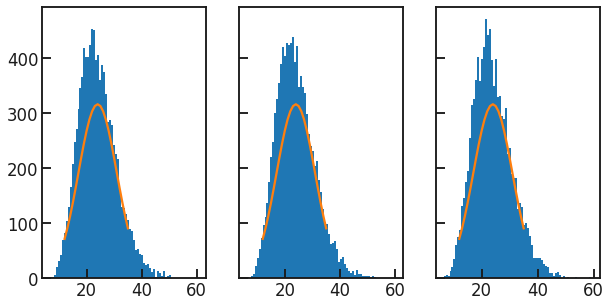

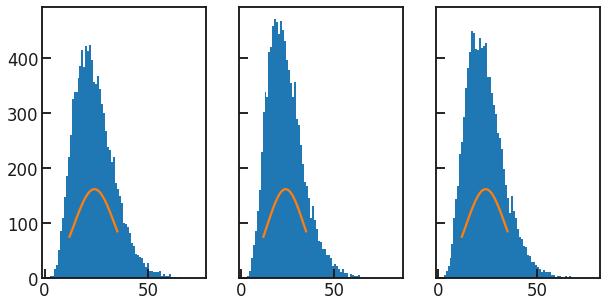

In [8]:
nsamples = 10000
nbins = 75

distribution(12, nsamples, nbins, box_muller)
distribution(12, nsamples, nbins, springer_moro)

239844.5494505322 801.2145211906854
59.98701093710102 59.97015209393968 59.96113736263305
239431.14694411232 396.9011724522156
59.94756799324021 60.0019889572034 59.85778673602808
2159396.8543642443 2382.833077874286
179.9642563644593 179.9462993679803 179.949737863687
2159839.7352906005 1219.978417142855
179.8372151011458 179.9913054174228 179.98664460755003
21188.180147200692 26.22594504164486
178.95942617381064 177.42233153937818 176.56816789333908
22286.11512907578 13.49222301305645
177.96862247884127 180.89391577266076 185.7176260756315


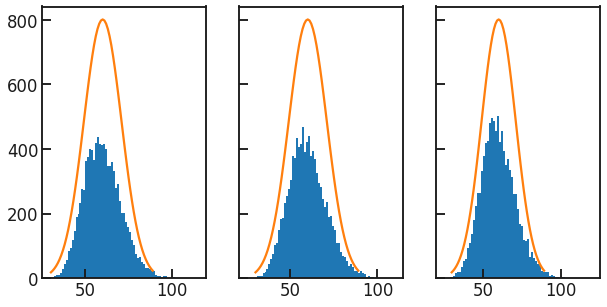

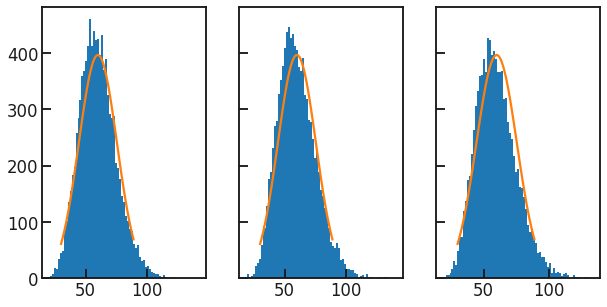

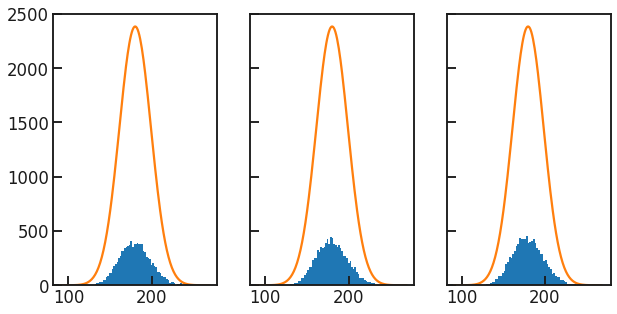

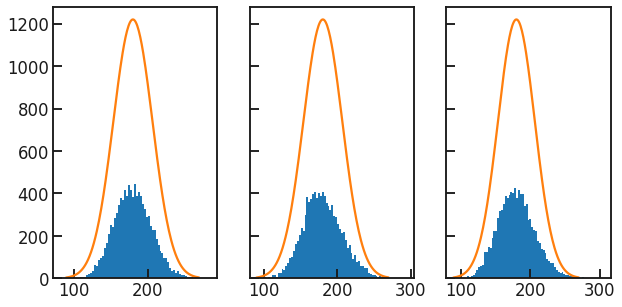

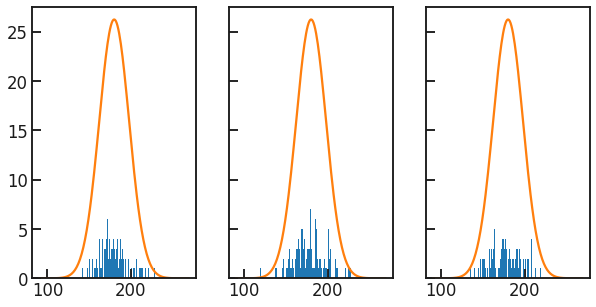

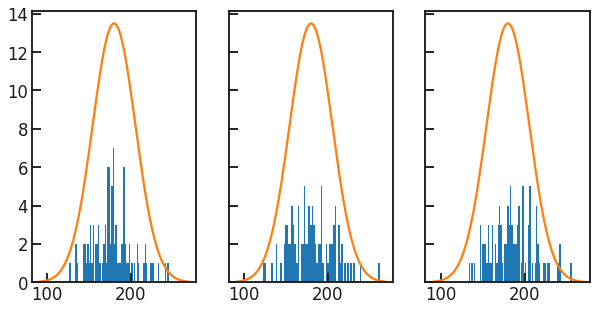

In [9]:
distribution(30, nsamples, nbins, box_muller)
distribution(30, nsamples, nbins, springer_moro)

distribution(90, nsamples, nbins, box_muller)
distribution(90, nsamples, nbins, springer_moro)

distribution(90, 100, nbins, box_muller)
distribution(90, 100, nbins, springer_moro)